# SVM을 활용한 이미지 분류

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.svm import SVC
from tqdm import tqdm
import matplotlib.pyplot as plt

### 데이터 로드

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.3,))
])

train_dataset = torchvision.datasets.MNIST(root="./dataset", train=True, download=False, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./dataset" , train=False, download=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False, num_workers=2)

### 특징 추출

In [4]:
train_features = []
train_labels = []

for i, data in enumerate(train_loader, 0) : 
    inputs, labels = data 
    inputs = inputs.view(inputs.shape[0], -1)
    train_features.append(inputs)
    train_labels.append(labels)
"""
train_loader 미니배치 데이터 -> 2차원으로 펼친 후 -> train_feature, train_labels 각 리스트에 저장 -> 최종 텐서 변환 (훈련 데이터 사용가능)
"""    
train_features = torch.cat(train_features, dim=0)
train_labels = torch.cat(train_labels, dim=0)

test_features = []
test_labels = []
for i, data in enumerate(test_loader, 0) : 
    inputs, labels = data
    inputs = inputs.view(inputs.shape[0], -1)
    test_features.append(inputs)
    test_labels.append(labels)
    
test_features = torch.cat(test_features, dim=0)
test_labels = torch.cat(test_labels, dim=0)

### SVM을 활용한 이미지 분류 

In [5]:
import time 
print("SVM MODEL TRAIN AND TEST")
start_time = time.time()
model = SVC(C=1.0, kernel='rbf', gamma=0.01)
model.fit(train_features.numpy(), train_labels.numpy())
acc = model.score(test_features.numpy(), test_labels.numpy())

end_tiem = time.time()
print("ACC >>" , acc)
train_tiem = end_tiem - start_time
print("Training Time : {:.2f} seconds".format(train_tiem))

SVM MODEL TRAIN AND TEST
ACC >> 0.9337
Training Time : 9681.36 seconds


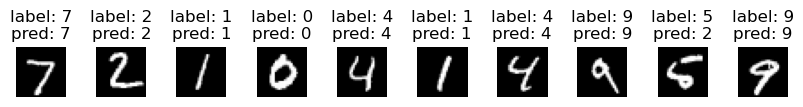

In [11]:
# 예측 결과 시각화
def plot_images(images, labels, preds):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1))
    
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape((28, 28)), cmap='gray')
        title = 'label: {}\npred: {}'.format(labels[i], preds[i])
        ax.set_title(title)
        ax.axis('off')
    plt.subplots_adjust(top=0.5, bottom=0, hspace=0, wspace=0.5)
    plt.show()

# 테스트 이미지 가져오기
test_images, test_labels = next(iter(test_loader))
test_images = test_images.view(test_images.shape[0], -1)

# 모델 예측
test_preds = model.predict(test_images.numpy())

# 결과 시각화
plot_images(test_images.numpy(), test_labels.numpy(), test_preds)